# RNN & LSTM (GRU)

# 1. RNN

## #1. 순차데이터 
- 텍스트나 시계열 데이터(time series data)와 같이 순서에 의미가 있는 데이터

## #2. RNN(Recurrent neural network , 순환신경망)
-  순환 신경망이란 ? : 순차 데이터나 시계열 데이터(연속데이터)를 이용하는 인공 신경망 유형

### 2-1) RNN 특징 
1. 언어 변환, 자연어 처리(nlp), 음성 인식, 이미지 캡션과 같은 순서 문제나 시간 문제에 흔히 사용됨 
2. 과거의 입력으로부터 정보를 얻어 현재의 입력과 출력에 영향을 줌
3. 네트워크의 각 계층 내에서 같은 가중치 매개변수를 공유
4. BPTT(backpropagation through time) 알고리즘을 사용하여 기울기를 결정함. 즉 모델이 출력 계층에서 입력 계층까지의 오류를 계산하는 방식으로 스스로 학습함( 각 시간 단계에서 오류의 합계를 구함)
    - 피드포워드 네트워크는 각 계층에서 매개변수를 공유하지 않으므로 오류의 합계를 구할 필요가 없음. 
   
   
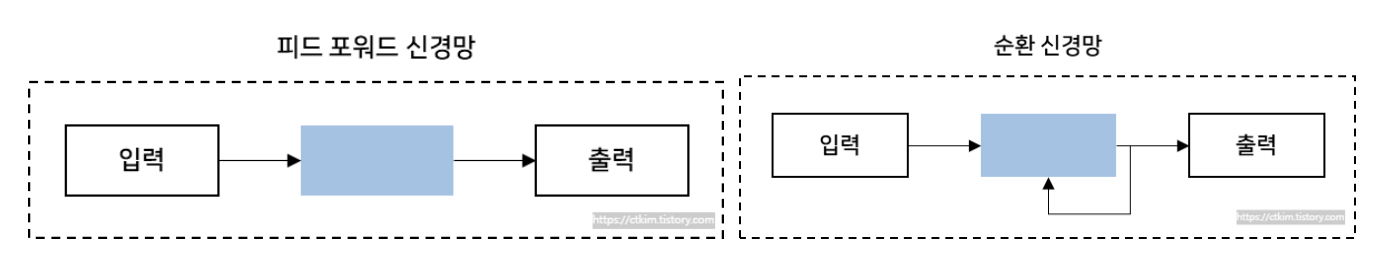

###  2-2) 기본개념 
1. 타임스텝 : 샘플을 처리하는 한 단계
2. 셀 : 순환층
3. 은닉상태 : 셀의 출력 


### 2-3) RNN 셀의 구조 

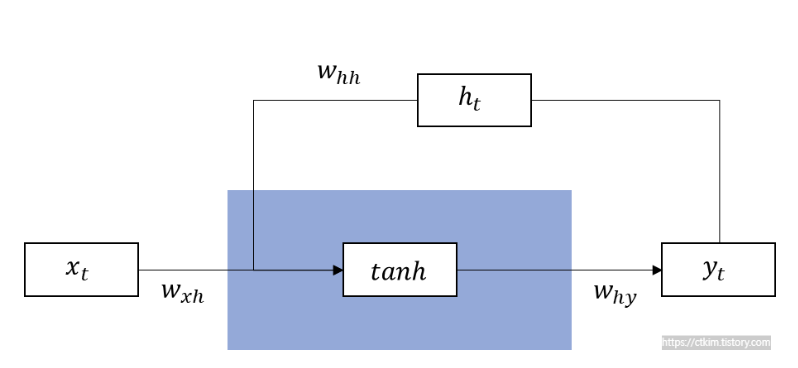


- 셀은 자신의 이전 상태와 새로운 입력을 결합하여 활성화 함수에 적용 
- 주로 활성화함수는 하이퍼볼릭 탄젠트 함수(tanh) 사용하고 결과는 노드의 출력 h로 계산됨 
- 이것이 다시 순환되어 피드백됨

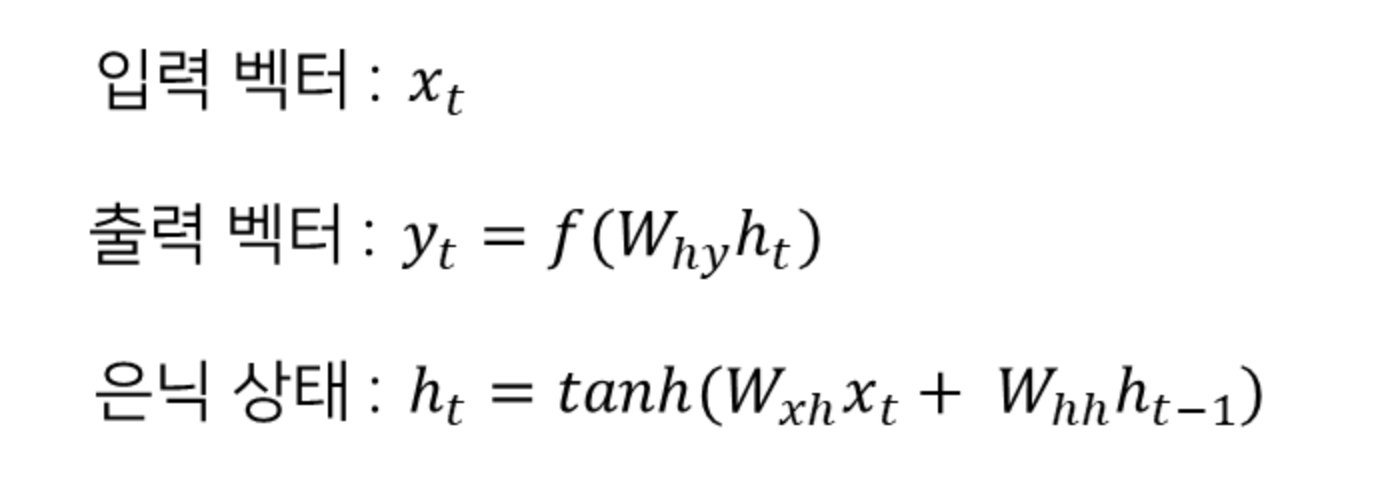

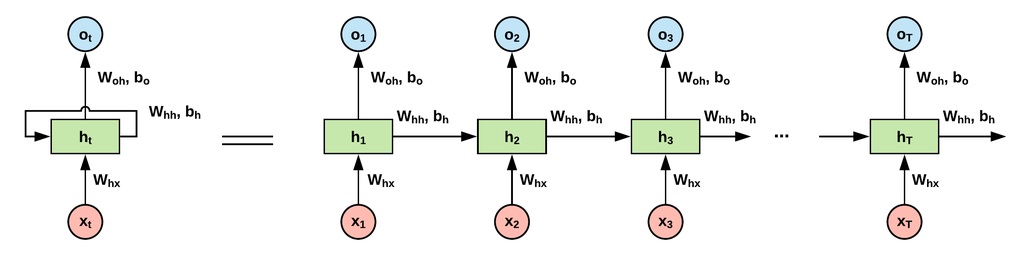

### 2-4) RNN 유형
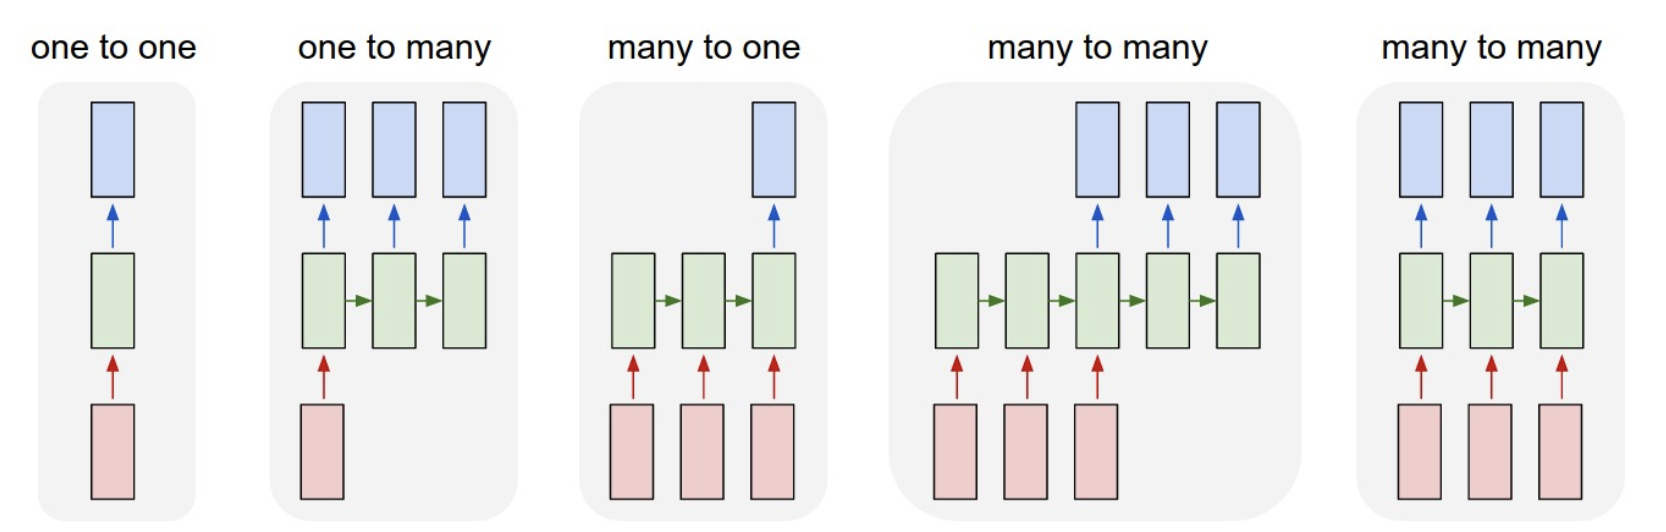


### 1. one-to-one
- 한 단어 번역 

### 2. one-to-many
- 한 단어로 문장생성 
- 이미지를 입력받아 이를 설명하는 문장을 만들어내는 이미지 캡셔닝(Image Captioning)


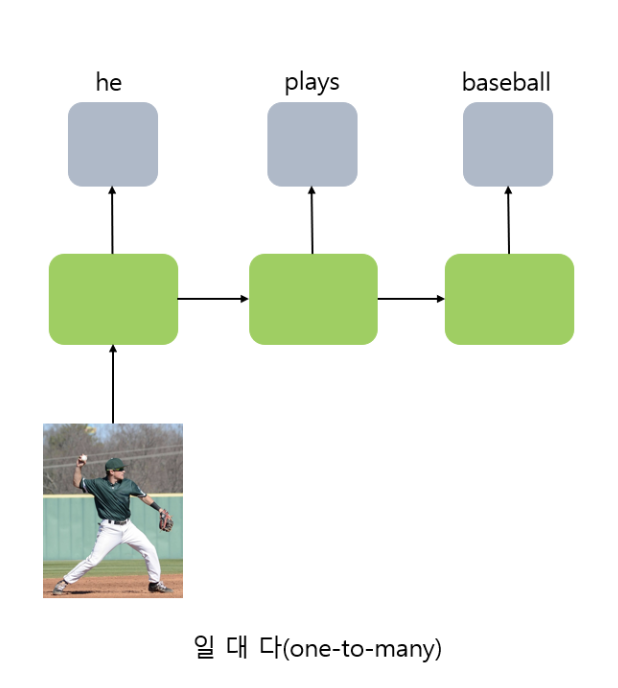



- 이미지 캡셔닝? 이미지에 대한 설명을 만들어 내는 것 

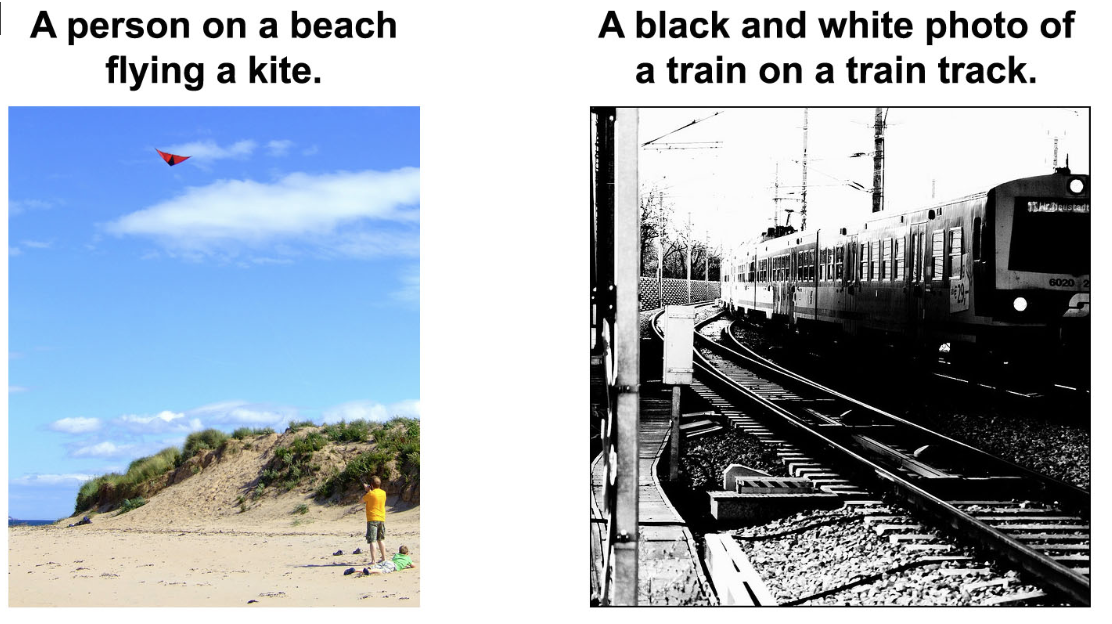

### 3. many-to-one
- 예측 , 스팸메일 분류 
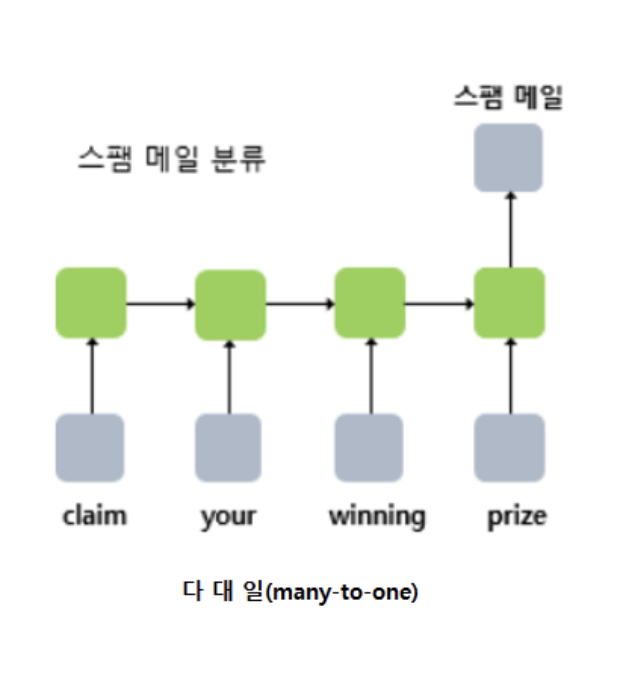




- 문장이 긍정인지 부정인지 판단하는 감성 분석(sentiment analysis)
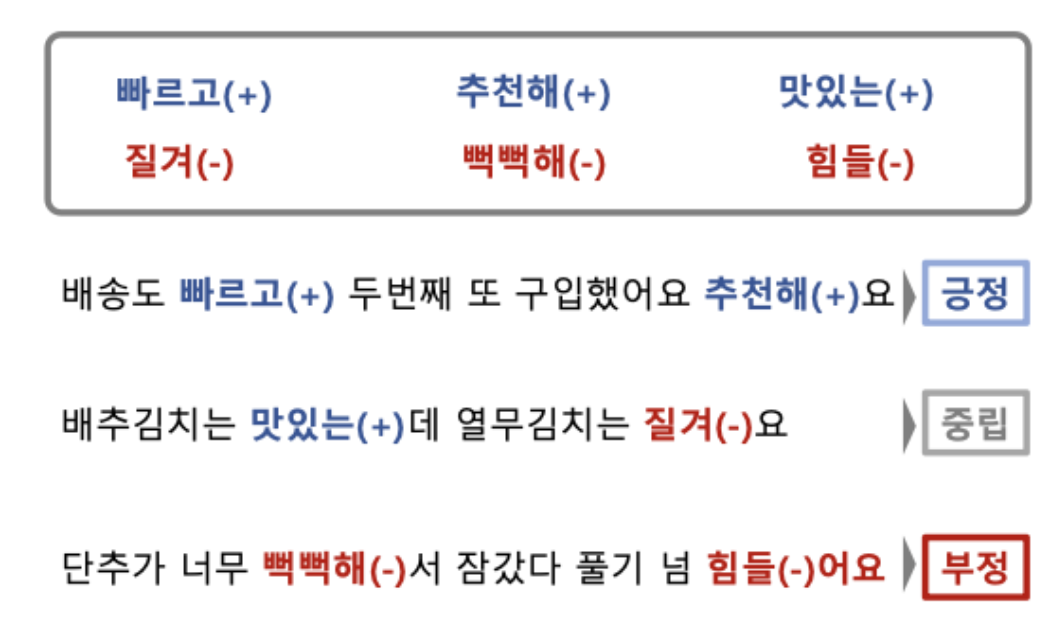

### 4-1. many-to-many(Sequence-to-Sequence, Seq2Seq)
- sequential한 벡터를 받아 모두 입력한 뒤 sequential한 벡터를 출력한다.
- 번역할 문장을 입력받아 번역된 문장을 내놓는 기계 번역(Machine translation)에 사용된다.
    - 기계번역 : 소프트웨어를 통해 한 언어에서 다른 언어로 텍스트나 음성을 번역하는 것
    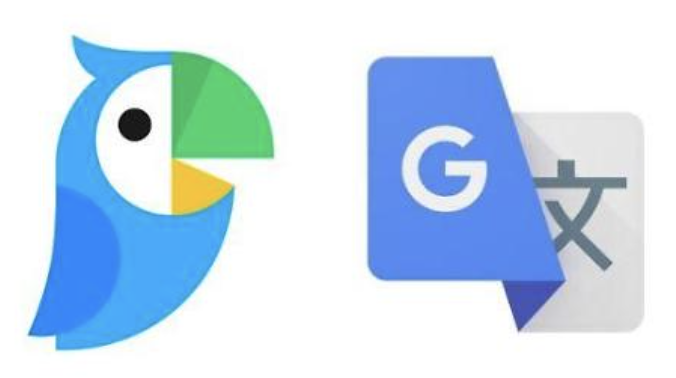



### 4-2. many-to-many
- sequential 벡터를 입력받는 즉시 sequential 벡터를 출력한다.
- 비디오를 프레임별로 분류(video classification per frame)하는 곳에 사용된다.

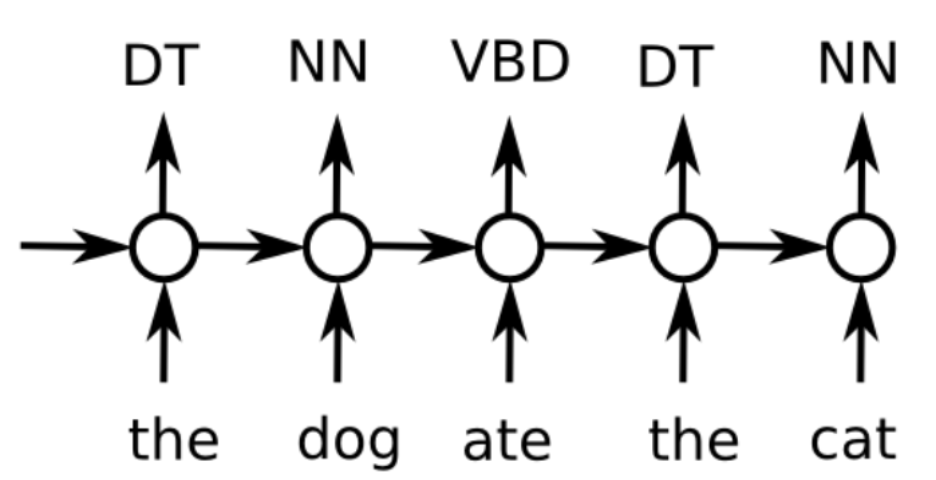

### 2-5) RNN에서 탄젠트함수를 사용하는 이유 
- relu : 이전 값이 커짐에 따라 오버플로우가 발생하는 문제 (NN의 내부는 계속 순환하는 구조로 값이 1보다 크게 되면, ReLU 특성상 값이 발산할 수 있기 때문에 적합하지 않음)
- sigmoid : 미분의 최대값이 0.25이기 때문에, Deep해질수록 Vanishing Gradient 가 발생
- tanh : 상당부분 기울기 소실 문제 해소 -> 완벽히 해결되는 것은 아님 



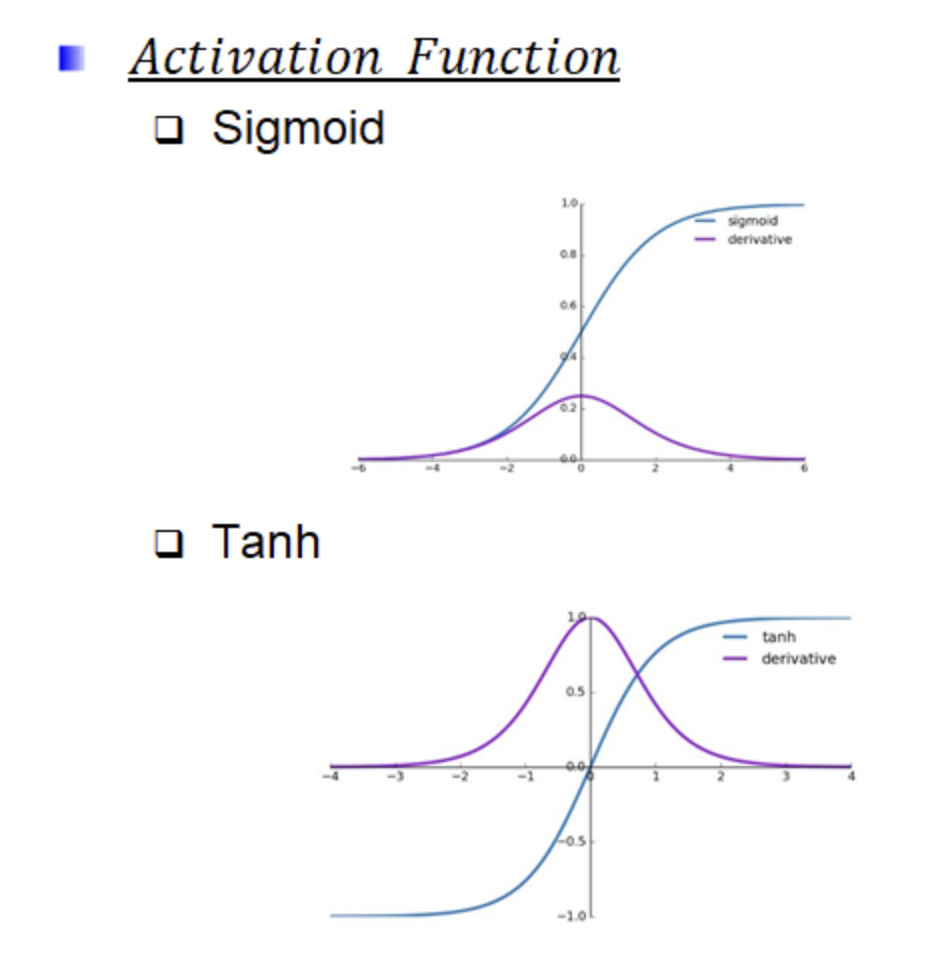

### 2-4) RNN의 2가지 기울기 문제 -> 역전파 과정에서 문제 발생 

- 역전파 과정에서 RNN의 활성화 함수인 tanh의 미분값을 전달하게 됨.
- 아래의 이미지는 tanh를 미분한 것

> 블로그 링크 : https://techblog-history-younghunjo1.tistory.com/481

1. 기울기 폭주(폭발)(exploding gradients) -> 기울기가 너무 커서 불안정한 모델이 만들어짐 
- weight에 대한 행렬 계산 과정에서 값이 1보다 큰 경우 기울기가 폭발함 

<발생하는 문제>
- (-4, 4)이외의 범위에서는 거의 0에 가까운 값을 보임.
- 역전파 과정에서 이 값을 반복해서 곱함.

2. 기울기 소실(vanishing gradients) -> 기울기가 너무 작으면 계속 더 작아지고, 가중치가 0이 되면 업데이트가 일어나지 않으므로 무의미해짐 

### 2-5) RNN의 다른 문제들  
1. 순차적으로 처리되기 때문에 학습속도와 성능저하 (병렬처리의 어려움)
2. 장의 의존성을 학습하는데 어려움 -> 시퀀스가 길어지는 경우 이전의 정보가 희석되어 장기적인 의존성을 파악하는데 어려움을 겪게 됨 


### 2-6) 기울기 폭발 문제 해결 
- gradient clipping 

- 인위적으로 폭발하려는 기울기를 잘라내는 것 
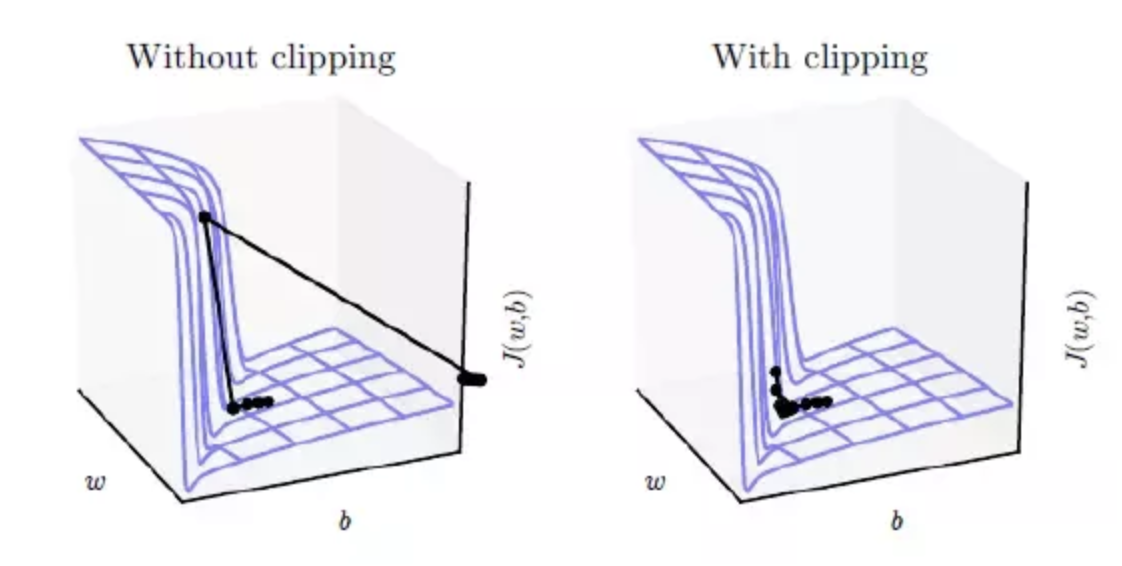

### 2-7) 기울기 소실 문제 해결 
-> 기울기 소실 문제를 해결하기위해 LSTM, GRU 같은 RNN변형 모델 개발 

# LSTM (Long Short Term Memory)
- 기존의 RNN이 출력과 먼 위치에 있는 정보를 기억할 수 없다는 단점을 보완하여 장/단기 기억을 가능하게 설계한 신경망의 구조
- <span style="color:red">기억할 것은 오래 기억하고 잊을 것은 빨리 잊어버리게 하는 신경망 구조 </span>


    - LSTM도 RNN과 같은 체인 구조로 되어 있지만, 반복 모듈은 단순한 한 개의 tanh layer가 아닌 4개의 layer가 서로 정보를 주고받는 구조. 
    - LSTM 셀에서는 상태(state)가 크게 두 개의 벡터(ht , ct)로 나누어집니다. 
    - ht: 단기 상태(short-term state)
    - ct: 장기 상태(long-term state) :  타임 스텝마다 일부의 기억을 삭제하고 추가하는 과정을 거치게 된다

### RNN 구조

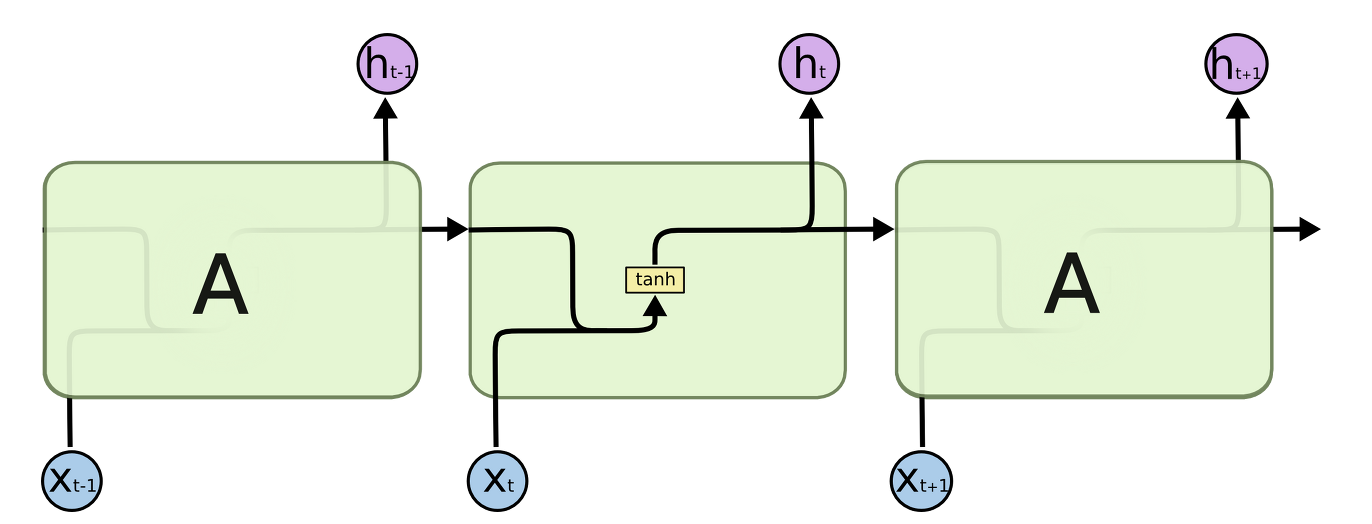

### LSTM 구조 
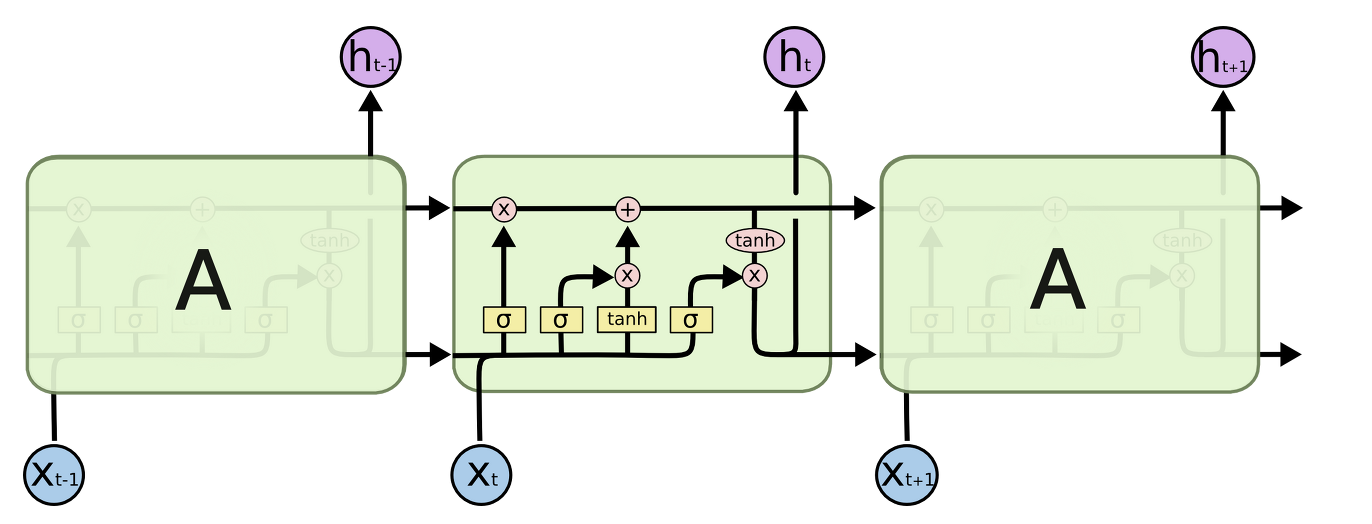



- LSTM도 똑같이 체인과 같은 구조
- 하지만 각 반복 모듈은 다른 구조를 갖고 있다. 
- 단순한 neural network layer 한 층 대신에, 4개의 layer가 특별한 방식으로 서로 정보를 주고 받도록 되어 있다.



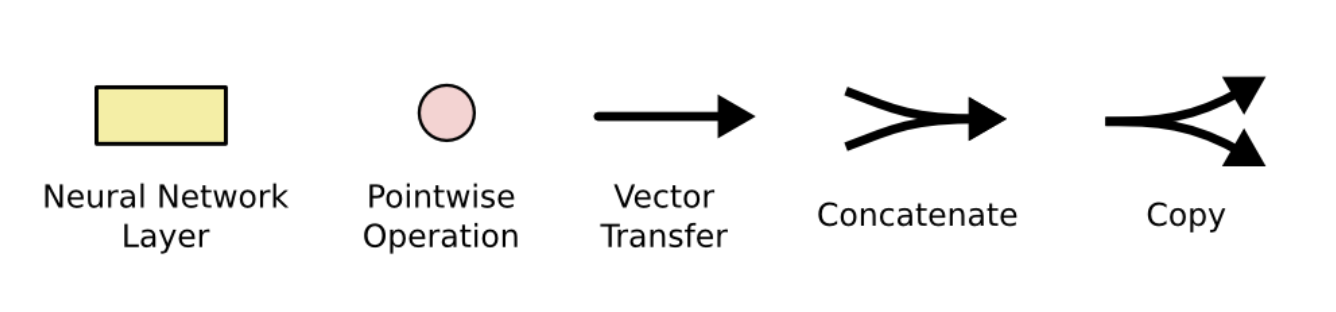


- 위 그림에서 각 선(line)은 한 노드의 output을 다른 노드의 input으로 vector 전체를 보내는 흐름을 나타낸다. 
- 분홍색 동그라미 : vector 합과 같은 pointwise operation을 나타낸다. 
- 노란색 박스 :  학습된 neural network layer다. 
- 합쳐지는 선 : concatenation을 의미하고, 
- 갈라지는 선 : 정보를 복사해서 다른 쪽으로 보내는 fork를 의미한다.



- > 블로그 : http://www.incodom.kr/LSTM
- > 블로그 : https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr
- > 블로그 : https://heung-bae-lee.github.io/2020/01/12/deep_learning_08/


## LSTM 실행 단계 


### 1. Cell state

- LSTM의 핵심은 cell state (모듈 그림에서 수평으로 그어진 윗 선에 해당)
- 정보가 바뀌지 않고 그대로 흐르도록 하는 역할입니다.

    
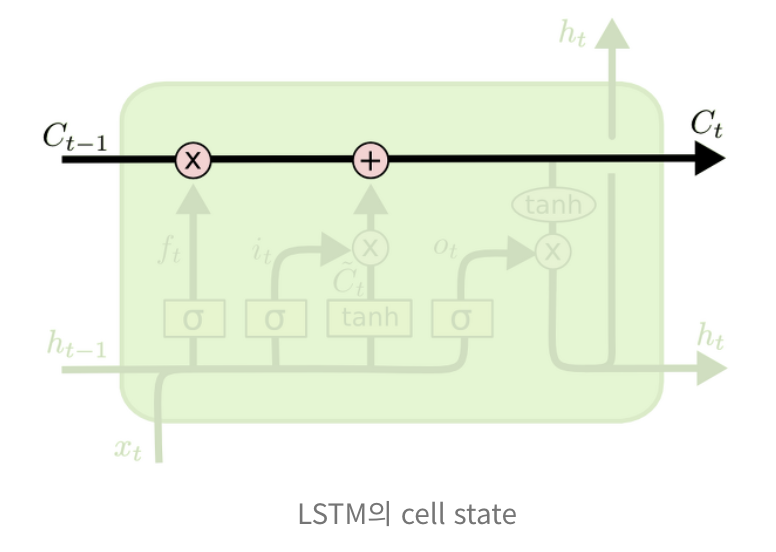



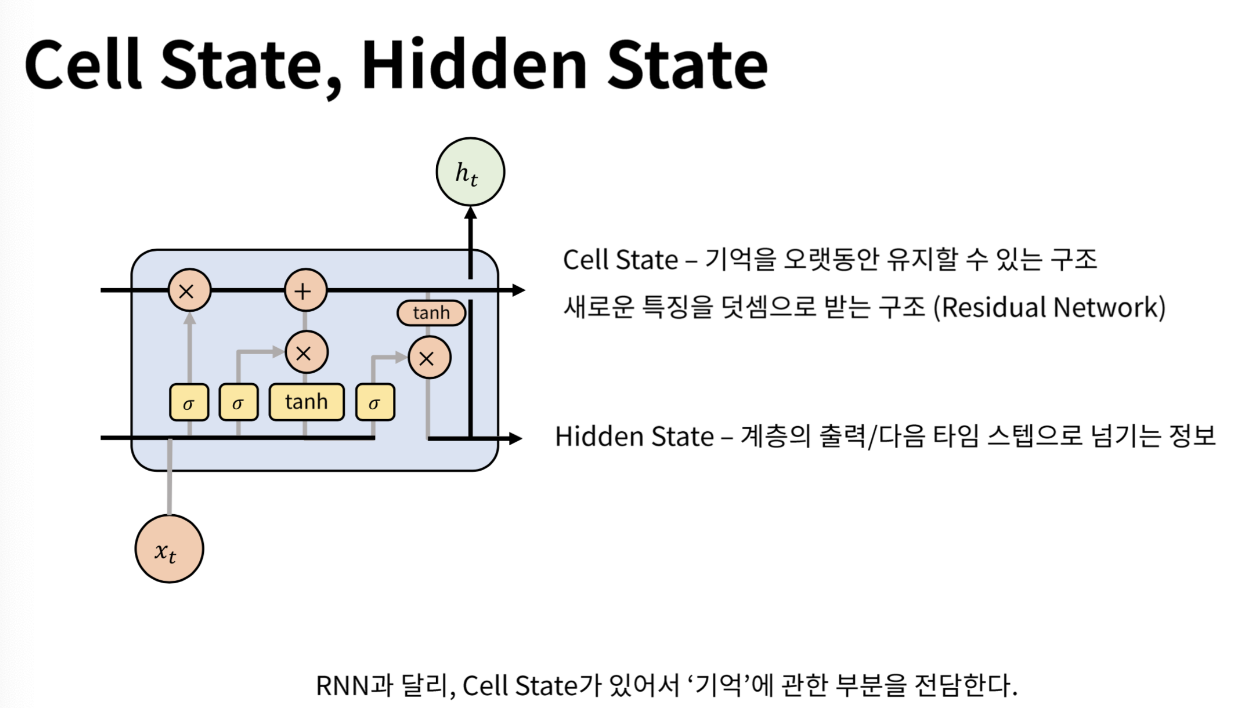

### 1-1. 
- Sigmoid layer는 0과 1 사이의 숫자를 내보내는데, 이 값은 각 컴포넌트가 얼마나 정보를 전달해야 하는지에 대한 척도를 나타낸다. 
- 그 값이 0이라면 "아무 것도 넘기지 말라"가 되고, 값이 1이라면 "모든 것을 넘겨드려라"가 된다.

- LSTM은 3개의 gate(forget, input, output)를 가지고 있음.


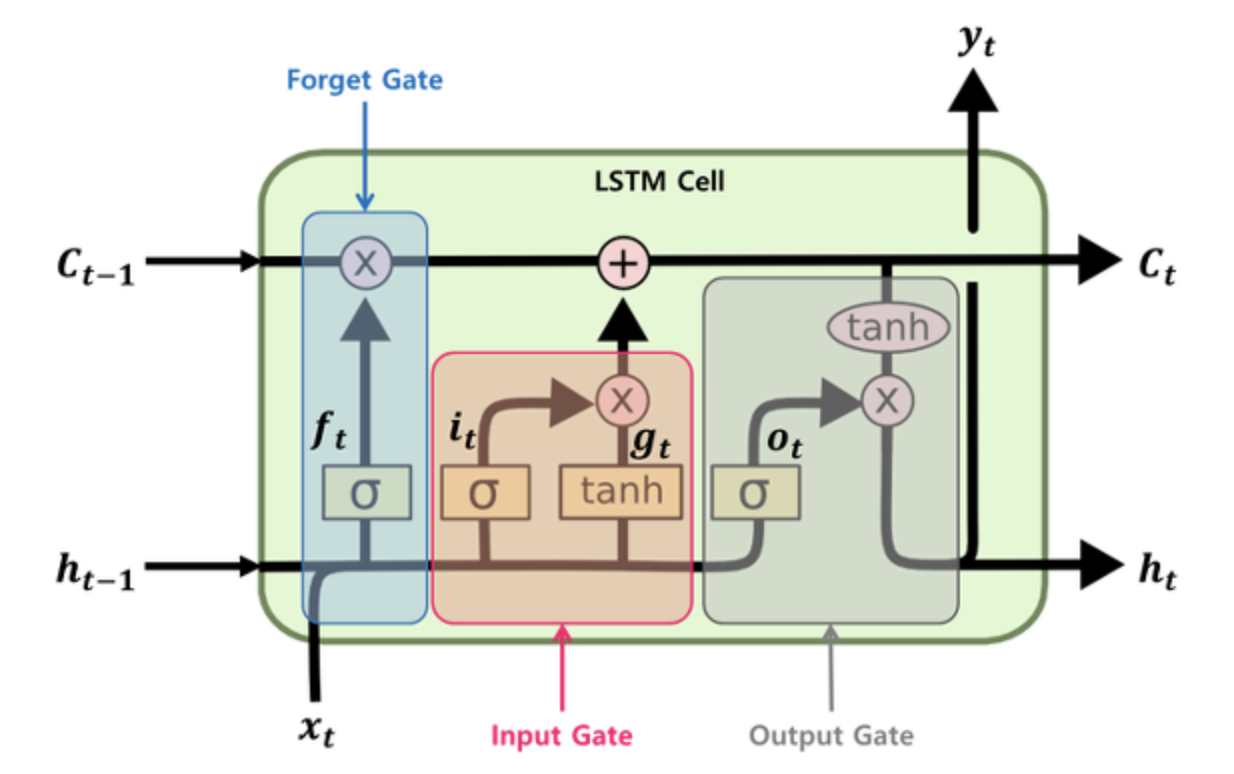

### 2. Forget gate
- forget gate는 cell state에서 sigmoid layer(시그모이드 활성함수)를 거쳐 0~1의 출력값을 가지고, 이 값에 따라서 어떤 정보를 버릴 것인지 정합니다.
- 즉, Cell State에 이 값을 곱해 주어 '얼만큼 잊을지, 얼만큼 기억할지' 결정 
    - 그래서 이 단계의 gate를 "forget gate layer"라고 부름. 
    - ft의 값이 1이면 "모든 정보를 보존"가 되고, 0이면 "정보 삭제"
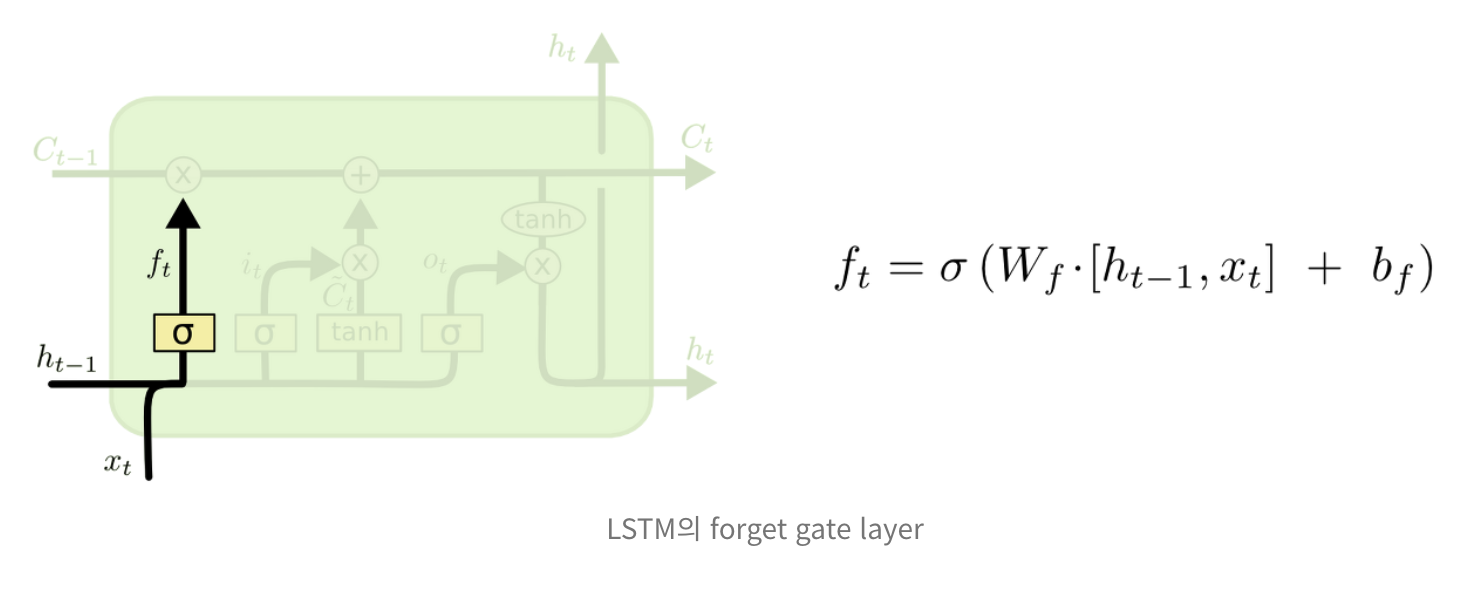

### 3.  Input gate


- 앞으로 들어오는 새로운 정보 중 어떤 것을 cell state에 저장할 것인지를 정함.
- 먼저 sigmoid layer를 거처 어떤 값을 얼마나 업데이트 할 것인지(0~1값)를 정함.
- tanh layer에서 새로운 후보 Vector(틸다 C) 생성.

- cell state에 더할 준비를 한다. 이렇게 두 단계에서 나온 정보를 합쳐서 state를 업데이트할 재료를 만들게 된다.

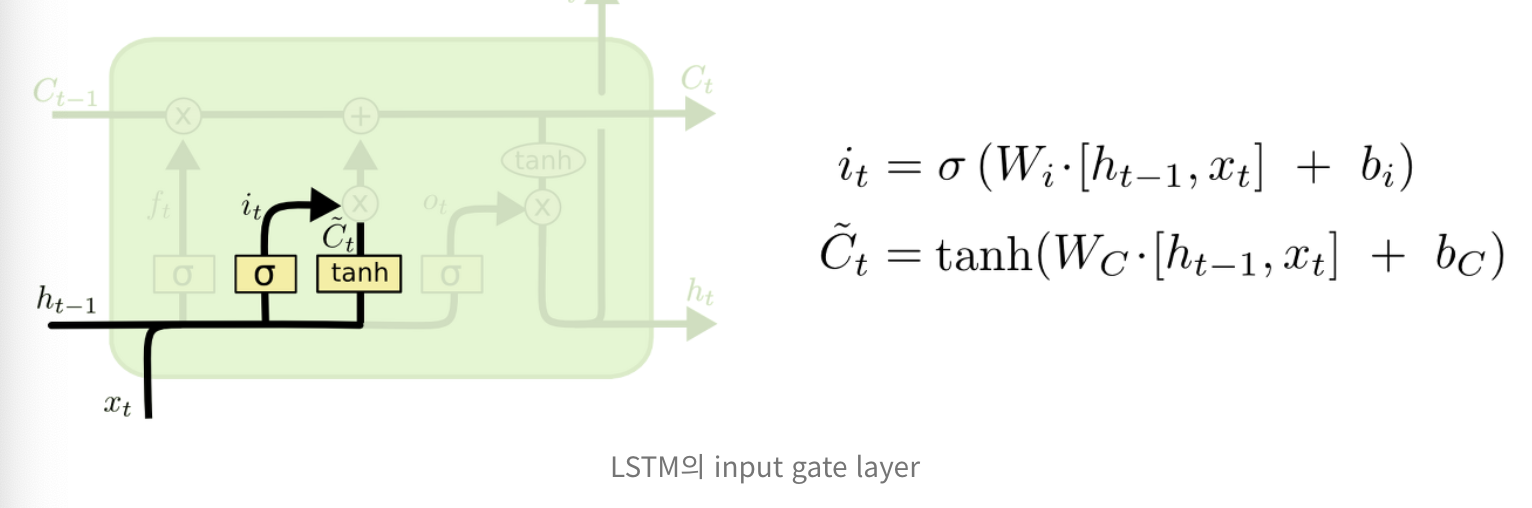

### 4. Cell state update.


- 이전 gate에서 버릴 정보들과 업데이트할 정보들을 정했다면, Cell state update 과정에서 업데이트를 진행합니다.



- 이제 과거 state인 \(C_{t-1}\)를 업데이트해서 새로운 cell state인 \(C_t\)를 만들 것이다. 이미 이전 단계에서 어떤 값을 얼마나 업데이트해야 할 지 다 정해놨으므로 여기서는 그 일을 실천만 하면 된다.

- 우선 이전 state에 \(f_t\)를 곱해서 가장 첫 단계에서 잊어버리기로 정했던 것들을 진짜로 잊어버린다. 그리고나서 \(i_t * \tilde{C}_t\)를 더한다. 이 더하는 값은 두 번째 단계에서 업데이트하기로 한 값을 얼마나 업데이트할 지 정한 만큼 scale한 값이 된다.


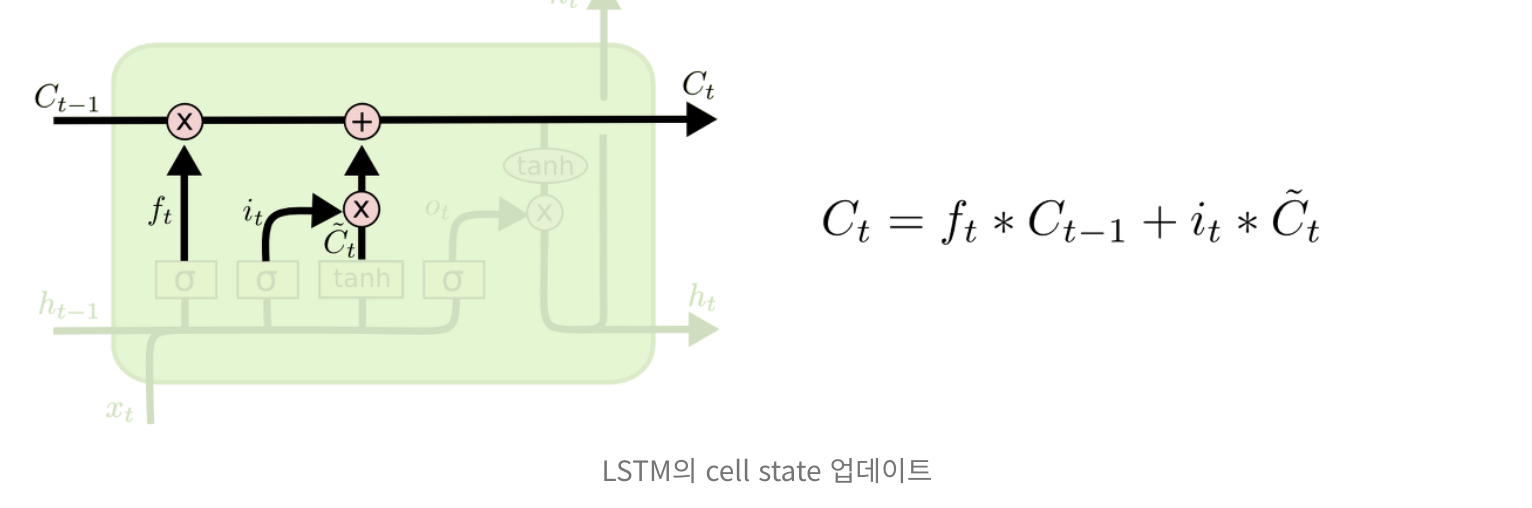

### 5. Output gate


- Output gate는 어떤 정보를 output으로 내보낼지 결정.
- 먼저 sigmoid layer에 input data를 넣어 output 정보를 정한 후 Cell state를 tanh layer에 넣어 sigmoid layer의 output과 곱하여 output으로 내보낸다.

- 그리고나서 cell state를 tanh layer에 태워서 -1과 1 사이의 값을 받은 뒤에 방금 전에 계산한 sigmoid gate의 output과 곱해준다. 
- - Cell로부터 출력을 얼마나 내보낼지 결정하는 역할 (즉, output으로 보내고자 하는 부분만 내보낼 수 있음.)


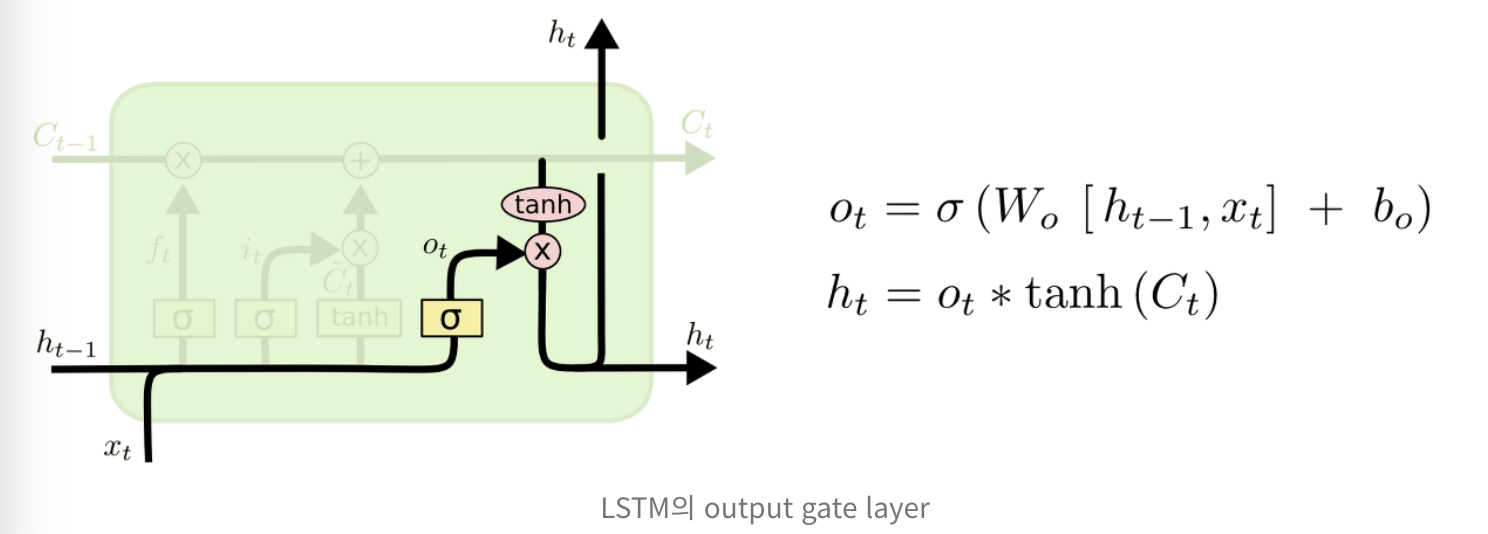

# GRU
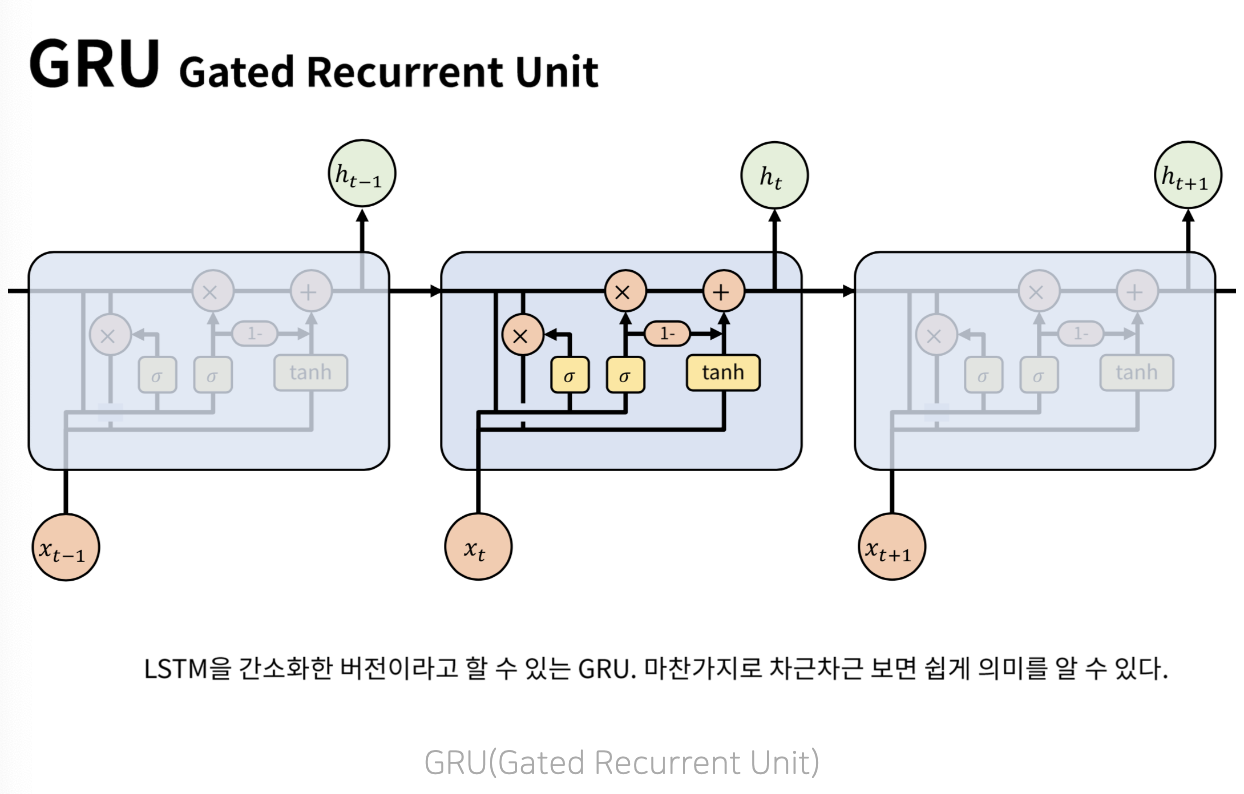

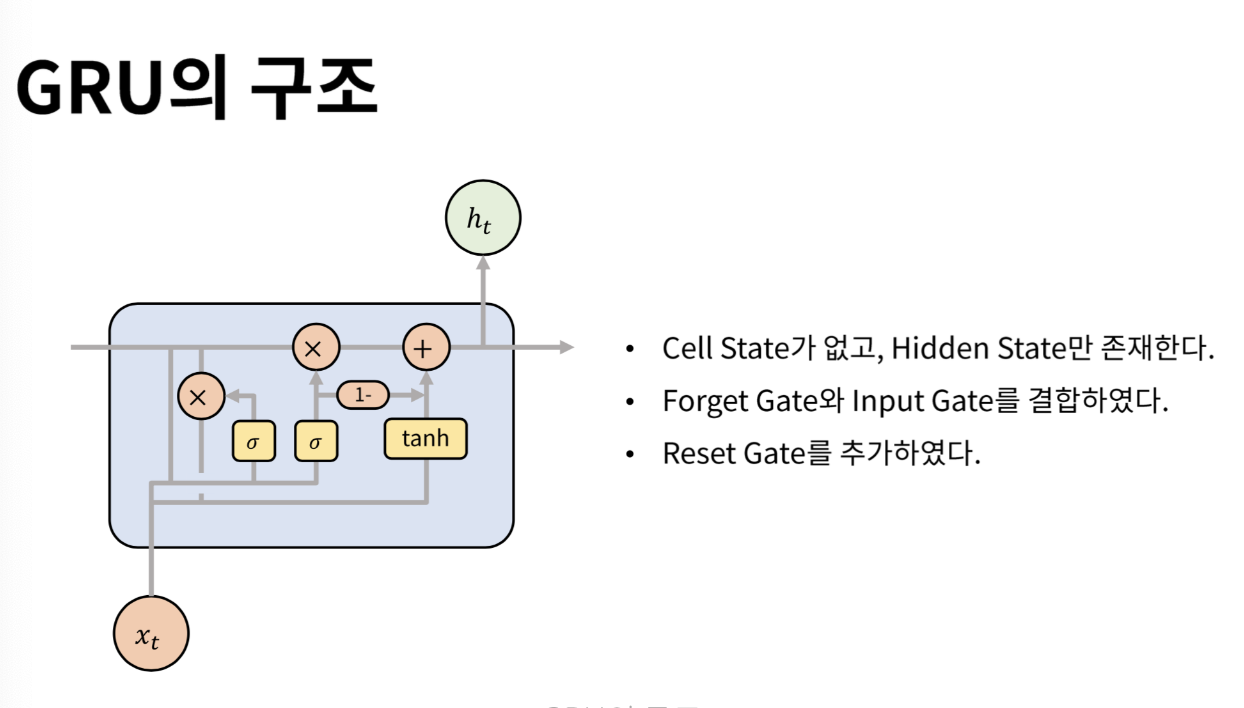